# Import and load spam dataset 

In [67]:
import nltk
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [28]:
df = pd.read_csv("spam.csv", encoding='Windows-1252', index_col=None)
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [29]:
df = df.drop(columns=['Unnamed: 2','Unnamed: 3','Unnamed: 4'], axis=1)

In [30]:
df = df.rename(columns=({'v1':'label','v2':'text'}))
df.head()

,label,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


# insight data

In [31]:
df.describe().T

,count,unique,top,freq
label,5572,2,ham,4825
text,5572,5169,"Sorry, I'll call later",30


In [32]:
df.groupby('label').describe()

text                                                               
      count unique                                                top freq
label                                                                     
ham    4825   4516                             Sorry, I'll call later   30
spam    747    653  Please call our customer service representativ...    4

<AxesSubplot:xlabel='label', ylabel='count'>

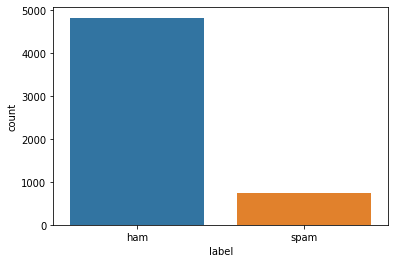

In [65]:
sns.countplot(data=df, x='label')

In [33]:
df['length'] = df['text'].apply(len)

In [34]:
df.head()

,label,text,length
0,ham,"Go until jurong point, crazy.. Available only ...",111
1,ham,Ok lar... Joking wif u oni...,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,ham,U dun say so early hor... U c already then say...,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",61


<AxesSubplot:xlabel='length', ylabel='Count'>

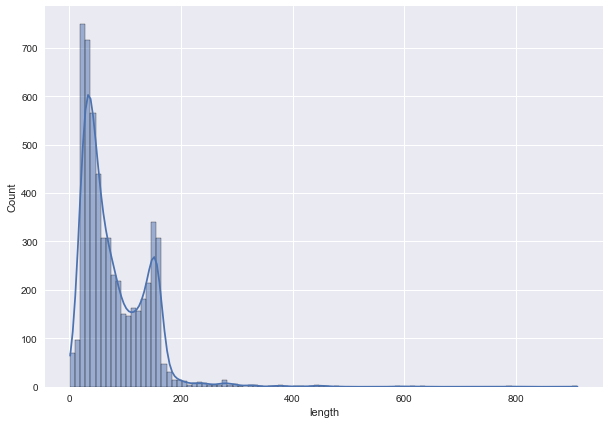

In [84]:
plt.figure(figsize=(10,7))
sns.histplot(df['length'],bins=100, kde=True)

array([<AxesSubplot:title={'center':'ham'}>,
       <AxesSubplot:title={'center':'spam'}>], dtype=object)

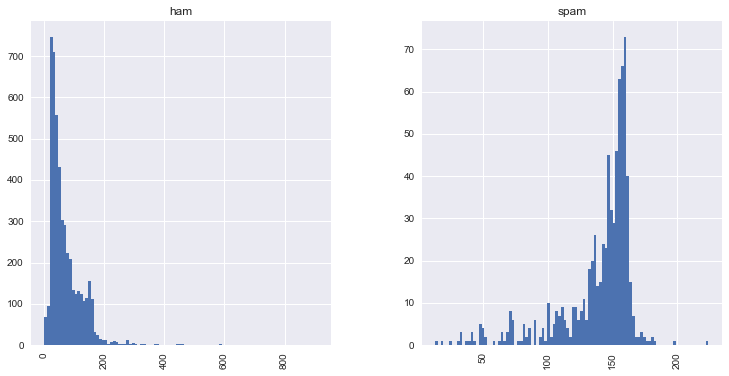

In [85]:
#Visualising the relation between length and type of messages
df.hist(column='length',by='label',bins=100,figsize=(12,6))

# Clean data

In [37]:
import string
from nltk.corpus import stopwords

In [38]:
"""
Creating A Funtion Convert The Messages For Tokenization

Step 1: Remove Punctuation
Step 2: Remove Stop Words
Step 3: Return a list of Clean words """

def remove_punctuation_and_stopwords(sms):
    sms_no_punctuation = [ch for ch in sms if ch not in string.punctuation]
    sms_no_punctuation = "".join(sms_no_punctuation).split()
    sms_no_punctuation_no_stopwords = [word.lower() for word in sms_no_punctuation if word.lower() not in stopwords.words("english")]
    return sms_no_punctuation_no_stopwords

In [39]:
df['text'].apply(remove_punctuation_and_stopwords)
df.head()

,label,text,length
0,ham,"Go until jurong point, crazy.. Available only ...",111
1,ham,Ok lar... Joking wif u oni...,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,ham,U dun say so early hor... U c already then say...,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",61


# Convert text documents to a matrix of token counts

In [40]:
#Use count vectorizer from sklearn to convert data into a sparcity matrix
from sklearn.feature_extraction.text import CountVectorizer

In [41]:
bag_of_words = CountVectorizer(analyzer=remove_punctuation_and_stopwords).fit(df['text'])

In [43]:
text_bow = bag_of_words.transform(df['text'])

In [44]:
text_bow

<5572x9431 sparse matrix of type '<class 'numpy.int64'>'
	with 49772 stored elements in Compressed Sparse Row format>

In [47]:
text_bow.shape

(5572, 9431)

## Transform a count matrix to a normalized tf or tf-idf representation

In [48]:
from sklearn.feature_extraction.text import TfidfTransformer

In [49]:
tifdf_transformer = TfidfTransformer().fit(text_bow)

In [50]:
text_tfidf = tifdf_transformer.transform(text_bow)

In [104]:
X_train, X_test, y_train, y_test = train_test_split(df['text'], df['label'],test_size=0.25)

print('Number of rows in training set: ', X_train.shape)
print('Number of rows in test set: ', X_test.shape)

Number of rows in training set:  (4179,)
Number of rows in test set:  (1393,)


# Multinomial Naive Bayes

In [89]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split

In [90]:
pipeline = Pipeline([
    ('bow', CountVectorizer(analyzer=remove_punctuation_and_stopwords)),
    ('tfidf', TfidfTransformer()),
    ('classifier', MultinomialNB())
])

In [58]:
pipeline.fit(X_train,y_train)

Pipeline(steps=[('bow',
                 CountVectorizer(analyzer=<function remove_punctuation_and_stopwords at 0x000001B38E623C10>)),
                ('tfidf', TfidfTransformer()),
                ('classifier', MultinomialNB())])

In [61]:
predict = pipeline.predict(X_test)
predict[:5]

array(['ham', 'ham', 'ham', 'spam', 'ham'], dtype='<U4')

In [62]:
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(predict, y_test))

              precision    recall  f1-score   support

         ham       1.00      0.95      0.98      1265
        spam       0.69      1.00      0.82       128

    accuracy                           0.96      1393
   macro avg       0.85      0.98      0.90      1393
weighted avg       0.97      0.96      0.96      1393



In [76]:
cm = confusion_matrix(predict,y_test)
print(cm)

[[1093  172]
 [ 107   21]]


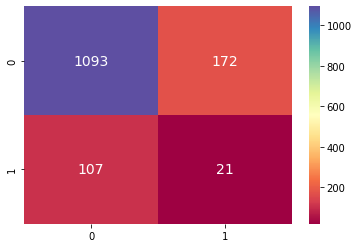

In [81]:
#visualize confusion matrix
heatmap = sns.heatmap(cm, annot = True, annot_kws = {'size': 14}, fmt = 'd', cmap = 'Spectral')  # cmap = 'magma', 'RdBu'

# Random Forest Classifier

In [102]:
from sklearn.ensemble import RandomForestClassifier

In [103]:
pipeline = Pipeline([
    ('bow', CountVectorizer(analyzer=remove_punctuation_and_stopwords)),
    ('tfidf', TfidfTransformer()),
    ('classifier', RandomForestClassifier(n_estimators = 100))
])

In [105]:
pipeline.fit(X_train,y_train)

Pipeline(steps=[('bow',
                 CountVectorizer(analyzer=<function remove_punctuation_and_stopwords at 0x000001B38E623C10>)),
                ('tfidf', TfidfTransformer()),
                ('classifier', RandomForestClassifier())])

In [106]:
predict = pipeline.predict(X_test)
predict[:10]

array(['ham', 'ham', 'ham', 'ham', 'ham', 'ham', 'spam', 'ham', 'ham',
       'ham'], dtype=object)

In [107]:
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(predict, y_test))

              precision    recall  f1-score   support

         ham       1.00      0.97      0.98      1244
        spam       0.79      0.99      0.88       149

    accuracy                           0.97      1393
   macro avg       0.89      0.98      0.93      1393
weighted avg       0.98      0.97      0.97      1393



In [ ]:
cm = confusion_matrix(predict,y_test)
print(cm)

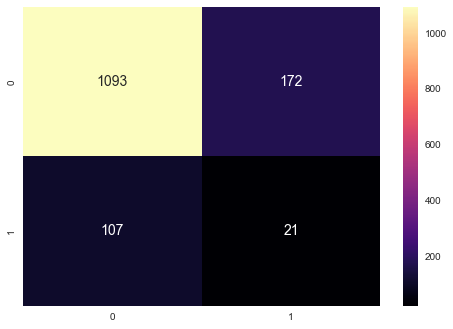

In [110]:
#visualize confusion matrix
heatmap = sns.heatmap(cm, annot = True, annot_kws = {'size': 14}, fmt = 'd', cmap = 'magma')  # 'Spectral' 'magma', 'RdBu', 'Blues

# SVM

In [125]:
from sklearn.svm import SVC

In [126]:
pipeline = Pipeline([
    ('bow', CountVectorizer(analyzer=remove_punctuation_and_stopwords)),
    ('tfidf', TfidfTransformer()),
    ('classifier', SVC(kernel = 'rbf', random_state = 10))
])

In [127]:
pipeline.fit(X_train,y_train)

Pipeline(steps=[('bow',
                 CountVectorizer(analyzer=<function remove_punctuation_and_stopwords at 0x000001B38E623C10>)),
                ('tfidf', TfidfTransformer()),
                ('classifier', SVC(random_state=10))])

In [128]:
predict = pipeline.predict(X_test)
predict[:10]

array(['ham', 'ham', 'ham', 'ham', 'ham', 'ham', 'spam', 'ham', 'ham',
       'ham'], dtype=object)

In [129]:
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(predict, y_test))

              precision    recall  f1-score   support

         ham       1.00      0.98      0.99      1232
        spam       0.85      0.99      0.92       161

    accuracy                           0.98      1393
   macro avg       0.93      0.98      0.95      1393
weighted avg       0.98      0.98      0.98      1393



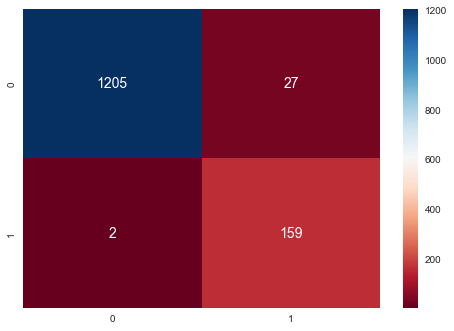

In [131]:
cm = confusion_matrix(predict,y_test)
heatmap = sns.heatmap(cm, annot = True, annot_kws = {'size': 14}, fmt = 'd', cmap = 'RdBu')  # 'Spectral' 'magma', 'RdBu', 'Blues

# Save and load

In [132]:
from joblib import dump, load
dump(pipeline, 'EmailClasification.joblib')

['EmailClasification.joblib']

In [133]:
model = load('EmailClasification.joblib')
model.predict(['Hi Russell, I have a job offer for you as a Machine Learning Engineer'])

array(['ham'], dtype=object)

***Russell C.***